<ipython-input-1-7b9062816740>:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Mayatnik uzunliklari va ularning periodlari:
   Length (m)  Period (s)
0         0.5    1.418503
1         1.0    2.006067
2         1.5    2.456920
3         2.0    2.837007


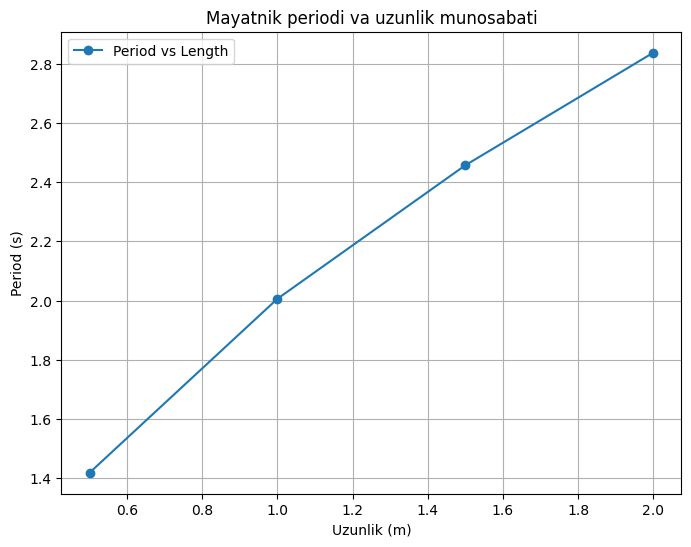

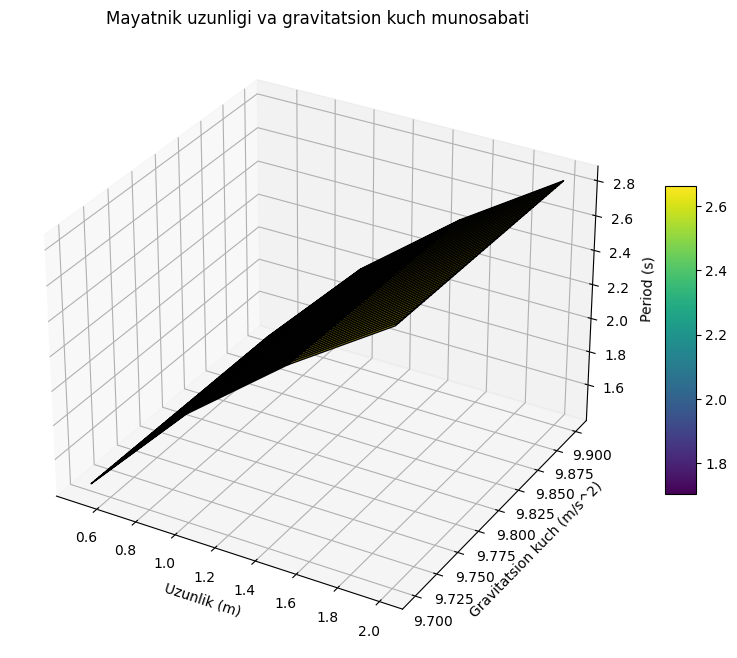

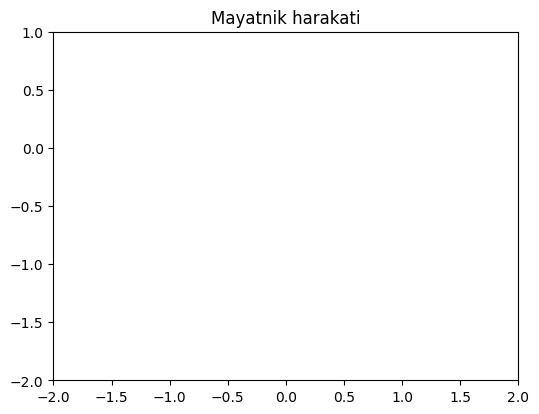


Hisoblangan gravitatsion tezlanish:
   Length (m)  Period (s)  Calculated g (m/s^2)
0         0.5    1.418503                  9.81
1         1.0    2.006067                  9.81
2         1.5    2.456920                  9.81
3         2.0    2.837007                  9.81


In [1]:
# Kerakli kutubxonalarni import qilish
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# 1. Teoretik asos
# Mayatnikning harakat periodi T = 2 * pi * sqrt(L / g)
# g - gravitatsion tezlanish, L - mayatnik uzunligi (m), T - period (s)

# 2. Ma'lumotlarni yig‘ish
# Turli uzunlikdagi mayatniklar uchun harakat periodlarini hisoblash
lengths = np.array([0.5, 1.0, 1.5, 2.0])  # Mayatnik uzunliklari (m)
g = 9.81  # Gravitatsion tezlanish (m/s^2)
periods = 2 * np.pi * np.sqrt(lengths / g)  # Mayatnik periodlari (s)

# Jadvalni tayyorlash
data = pd.DataFrame({'Length (m)': lengths, 'Period (s)': periods})
print("Mayatnik uzunliklari va ularning periodlari:")
print(data)

# 3. Grafiklar
# 2D grafik: Mayatnik periodi va uzunlik munosabati
plt.figure(figsize=(8, 6))
plt.plot(lengths, periods, marker='o', label='Period vs Length')
plt.title('Mayatnik periodi va uzunlik munosabati')
plt.xlabel('Uzunlik (m)')
plt.ylabel('Period (s)')
plt.grid()
plt.legend()
plt.show()

# 3D grafik: Uzunlik va gravitatsion kuch munosabati
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D ma'lumotlar
L, G = np.meshgrid(lengths, np.linspace(9.7, 9.9, 100))  # Uzunlik va g oralig'i
T = 2 * np.pi * np.sqrt(L / G)

# Sirt grafik
surf = ax.plot_surface(L, G, T, cmap='viridis', edgecolor='k')
ax.set_title('Mayatnik uzunligi va gravitatsion kuch munosabati')
ax.set_xlabel('Uzunlik (m)')
ax.set_ylabel('Gravitatsion kuch (m/s^2)')
ax.set_zlabel('Period (s)')
fig.colorbar(surf, shrink=0.5, aspect=10)
plt.show()

# 4. Animatsiya: Mayatnik harakatini simulyatsiya qilish (ixtiyoriy)
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 1)
ax.set_aspect('equal')
ax.set_title('Mayatnik harakati')

# Mayatnik chizish
line, = ax.plot([], [], 'o-', lw=2)
g = 9.81  # Gravitatsion tezlanish
L = 1.0  # Mayatnik uzunligi
theta0 = np.pi / 4  # Boshlang'ich burchak

# Harakat tenglamasi
def pendulum_position(theta0, t, g, L):
    omega = np.sqrt(g / L)  # Burchak chastota
    theta = theta0 * np.cos(omega * t)  # Burchak
    x = L * np.sin(theta)  # X koordinata
    y = -L * np.cos(theta)  # Y koordinata
    return x, y

# Animatsiya funksiyasi
def init():
    line.set_data([], [])
    return line,

def update(frame):
    x, y = pendulum_position(theta0, frame, g, L)
    line.set_data([0, x], [0, y])
    return line,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 10, 200), init_func=init, blit=True)
plt.show()

# 5. Natijalarni tahlil qilish
# g qiymatini hisoblash va taqqoslash
calculated_g = 4 * np.pi**2 * lengths / periods**2
data['Calculated g (m/s^2)'] = calculated_g
print("\nHisoblangan gravitatsion tezlanish:")
print(data)

# 6. Hisobot
# Grafiklar va animatsiyani hisobotga qo‘shing va nazariy xulosalar bilan taqdim qiling.
